In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('BTC.csv')
data['date'] = pd.to_datetime(data['date'])

In [3]:
# Focus only on 'close' price
close_prices = data['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

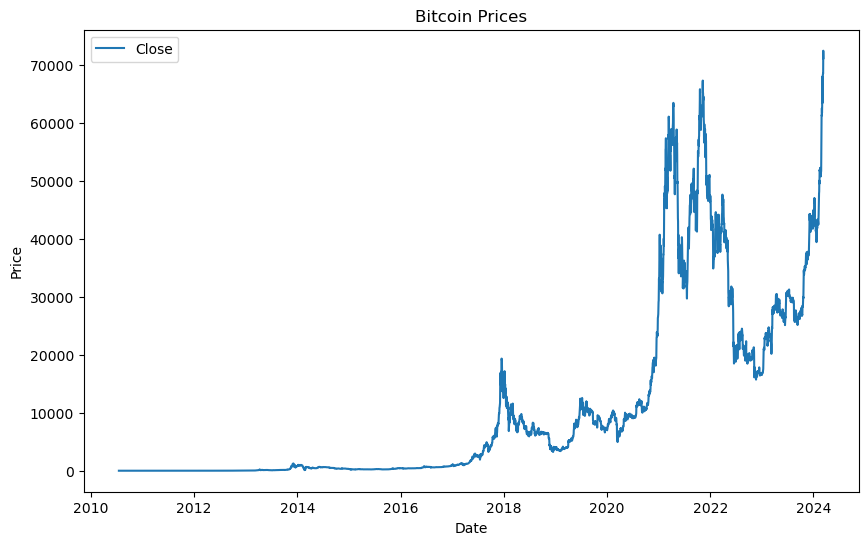

In [4]:
# Plotting the prices
plt.figure(figsize=(10,6))  # Set the figure size
plt.plot(data['date'], close_prices, label='Close')

plt.title('Bitcoin Prices')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Price')  # Y-axis label
plt.legend()  # Add a legend to specify which line corresponds to which price
plt.show()

In [5]:
# Creating dataset for LSTM
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(close_prices_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [6]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Building the LSTM model
model = Sequential([
    Input(shape=(time_step, 1)),  
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0090 - val_loss: 4.1395e-04
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0012 - val_loss: 3.7182e-04
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 8.4641e-04 - val_loss: 8.1945e-04
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0012 - val_loss: 3.5447e-04
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 8.2002e-04 - val_loss: 4.0633e-04
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 9.5967e-04 - val_loss: 7.4722e-04
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 8.5145e-04 - val_loss: 3.1531e-04
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0011 - val_loss: 2.8085e-04
Epoch 9/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 7.0471e-04 - val_loss: 2.3136e-04
Epoch 10/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 7.7509e-04 - val_loss: 2.6299e-04
Epoch 11/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 6.8492e-04 - 

In [9]:
# Making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [10]:
# Invert predictions back to original scale
train_predict = scaler.inverse_transform(np.column_stack((train_predict, np.zeros(train_predict.shape))))
test_predict = scaler.inverse_transform(np.column_stack((test_predict, np.zeros(test_predict.shape))))
y_train_inv = scaler.inverse_transform(np.column_stack((y_train, np.zeros(y_train.shape))))
y_test_inv = scaler.inverse_transform(np.column_stack((y_test, np.zeros(y_test.shape))))

In [11]:
np.shape(test_predict)

(986, 2)

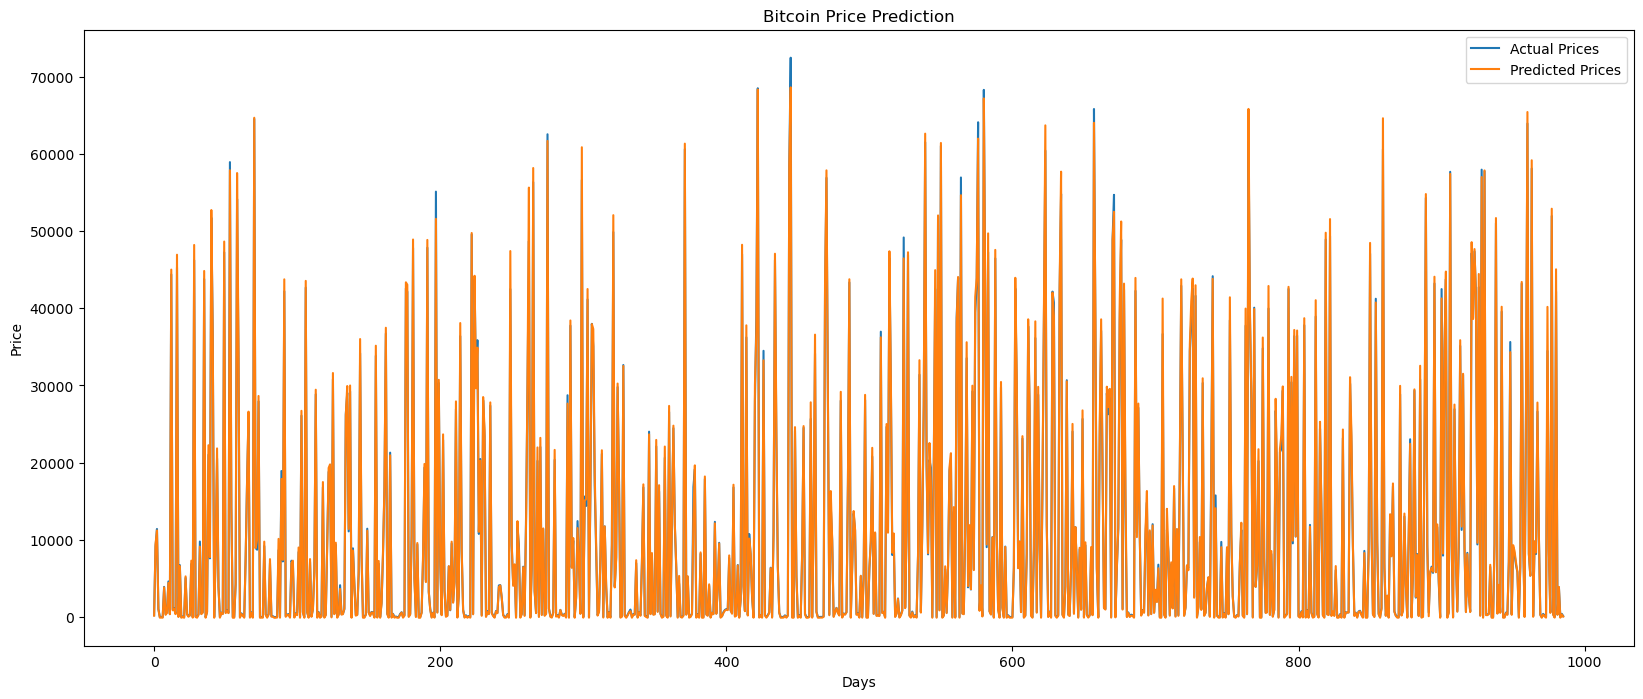

In [12]:
# Plotting actual vs predicted prices
plt.figure(figsize=(20, 8))
plt.plot(y_test_inv[:, 0], label='Actual Prices')
plt.plot(test_predict[:, 0], label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


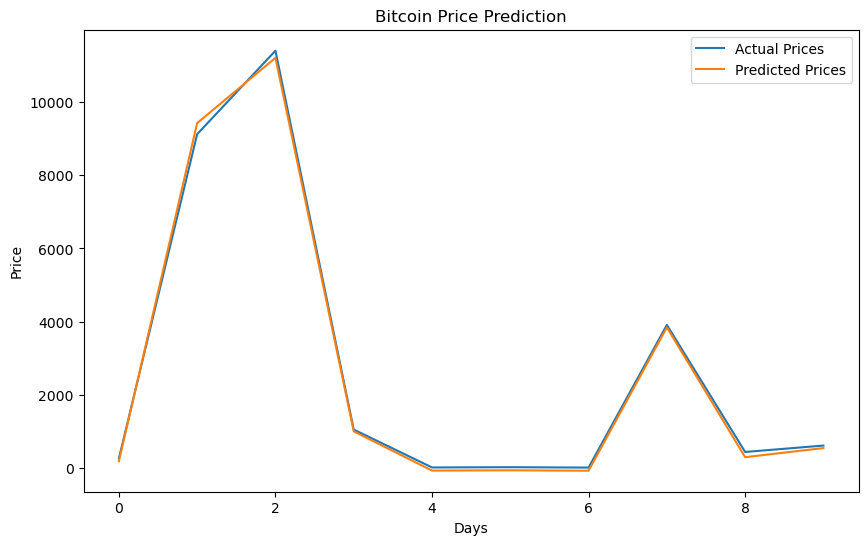

In [16]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test_inv[0:10, 0], label='Actual Prices')
plt.plot(test_predict[0:10, 0], label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


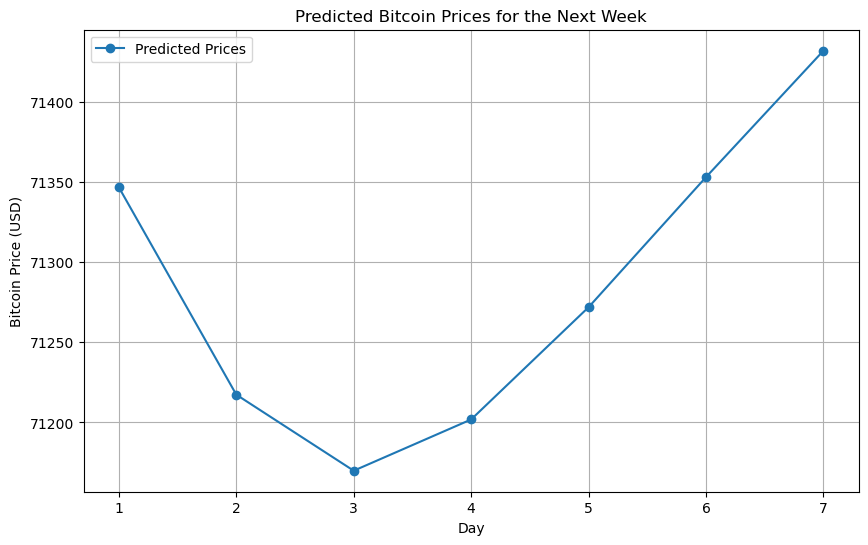

In [14]:
# USe the model to predict BTC prices for the next 7 days
def predict_next_week(model, last_60_days_scaled, scaler):
    future_predictions = []
    current_batch = last_60_days_scaled.reshape(1, 60, 1)  # Reshape to fit the model's input format

    for i in range(7):  # Predict the next 7 days
        # Predict the next day and append to future_predictions
        next_day_pred = model.predict(current_batch)[0]
        future_predictions.append(next_day_pred)
        
        # Update the batch to include the new prediction
        current_batch = np.append(current_batch[:,1:,:], [[next_day_pred]], axis=1)

    # Inverse transform to convert predictions to their original scale
    future_prices = scaler.inverse_transform(future_predictions)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 8), future_prices.flatten(), marker='o', linestyle='-', label='Predicted Prices')
    plt.title('Predicted Bitcoin Prices for the Next Week')
    plt.xlabel('Day')
    plt.ylabel('Bitcoin Price (USD)')
    plt.xticks(range(1, 8))
    plt.legend()
    plt.grid(True)
    plt.show()

    return future_prices

# Get the last 60 days of 'close' prices, assuming close_prices is your full array of prices
last_60_days_scaled = scaler.transform(close_prices[-60:])

# Predict the next week prices and plot them
predicted_prices = predict_next_week(model, last_60_days_scaled, scaler)